In [1]:
# --- Cell A: Imports and Data Loading ---

# Data manipulation and math libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset (replace with your actual path if needed)
file_path = r"C:\AI-Course\diabetes_sample.csv"
df = pd.read_csv(file_path)

# Display basic information
print("✅ Data successfully loaded!\n")
print(f"Shape: {df.shape}")        # (rows, columns)
print("\nFirst 5 rows:")
display(df.head())


✅ Data successfully loaded!

Shape: (500, 8)

First 5 rows:


,age,bmi,glucose,systolic_bp,smoker,phys_activity,family_history,diabetes
0,69,25.4,64.0,130.0,0,moderate,0,0
1,32,26.4,189.0,141.0,0,low,0,1
2,78,32.1,166.0,113.0,1,moderate,0,1
3,38,20.6,93.0,132.0,0,low,0,0
4,41,22.8,54.0,107.0,1,low,0,1


In [2]:
# --- Cell B: Data Cleaning and Summary Statistics ---

# 1️⃣ Check general information about dataset
print("🔍 Basic info:")
df.info()

print("\n🧮 Summary statistics:")
display(df.describe(include='all'))

# 2️⃣ Check for missing values
print("\n❓ Missing values per column:")
display(df.isnull().sum())

# 3️⃣ Handle missing values
#    Example: Fill numeric columns with median, categorical with mode
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values handled successfully.")

# 4️⃣ Check duplicates
duplicates = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicates}")

# Optionally remove them
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicate rows removed.")

# 5️⃣ Basic sanity check after cleaning
print("\n📊 Dataset shape after cleaning:", df.shape)
display(df.head())


🔍 Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             500 non-null    int64  
 1   bmi             485 non-null    float64
 2   glucose         485 non-null    float64
 3   systolic_bp     485 non-null    float64
 4   smoker          500 non-null    int64  
 5   phys_activity   500 non-null    object 
 6   family_history  500 non-null    int64  
 7   diabetes        500 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 31.4+ KB

🧮 Summary statistics:


,age,bmi,glucose,systolic_bp,smoker,phys_activity,family_history,diabetes
count,500.000000,485.000000,485.000000,485.000000,500.000000,500,500.000000,500.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,moderate,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,230,NaN,NaN
mean,51.146000,27.306804,112.140206,125.315464,0.332000,NaN,0.424000,0.898000
std,19.821566,6.371393,26.648712,11.257388,0.471403,NaN,0.494685,0.302951
min,18.000000,10.300000,45.000000,85.000000,0.000000,NaN,0.000000,0.000000
25%,34.000000,22.900000,95.000000,118.000000,0.000000,NaN,0.000000,1.000000
50%,51.000000,27.300000,111.000000,126.000000,0.000000,NaN,0.000000,1.000000
75%,69.000000,31.700000,131.000000,133.000000,1.000000,NaN,1.000000,1.000000



❓ Missing values per column:


age                0
bmi               15
glucose           15
systolic_bp       15
smoker             0
phys_activity      0
family_history     0
diabetes           0
dtype: int64


✅ Missing values handled successfully.

🧾 Number of duplicate rows: 0

📊 Dataset shape after cleaning: (500, 8)


C:\Users\USER\AppData\Local\Temp\ipykernel_5540\4213512983.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_5540\4213512983.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,age,bmi,glucose,systolic_bp,smoker,phys_activity,family_history,diabetes
0,69,25.4,64.0,130.0,0,moderate,0,0
1,32,26.4,189.0,141.0,0,low,0,1
2,78,32.1,166.0,113.0,1,moderate,0,1
3,38,20.6,93.0,132.0,0,low,0,0
4,41,22.8,54.0,107.0,1,low,0,1


<Figure size 1500x1000 with 0 Axes>

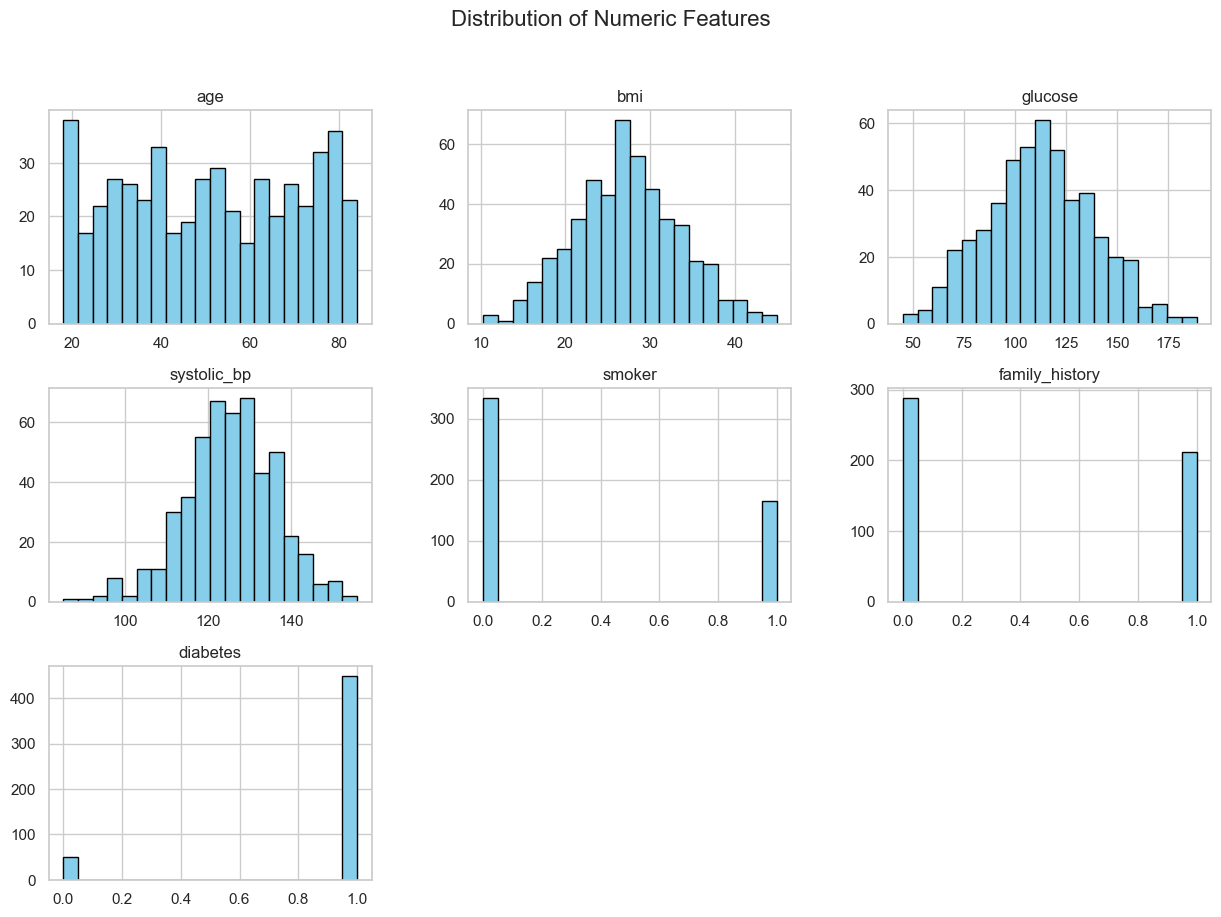

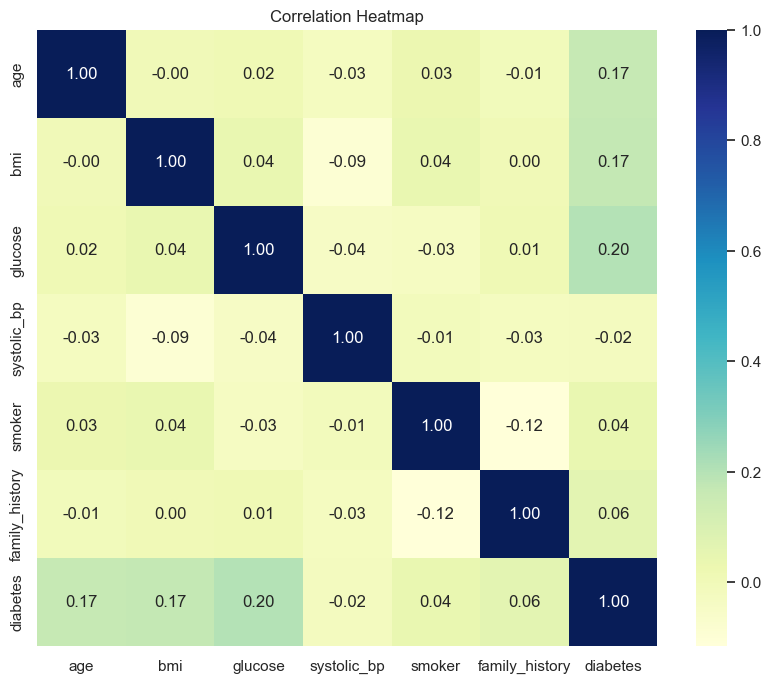

In [3]:
# --- Cell C: Exploratory Data Visualization ---

import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Distribution of numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
df[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

# 2️⃣ Check class balance for target variable (e.g., 'Diabetes')
if 'Diabetes' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Diabetes', data=df, palette='Set2')
    plt.title("Target Variable Distribution: Diabetes vs Non-Diabetes")
    plt.show()

# 3️⃣ Relationship between two key variables (example: BMI vs Glucose)
if 'BMI' in df.columns and 'Glucose' in df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x='BMI', y='Glucose', hue='Diabetes', data=df, palette='coolwarm', alpha=0.7)
    plt.title("Relationship: BMI vs Glucose")
    plt.show()

# 4️⃣ Correlation heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


<Figure size 1500x1000 with 0 Axes>

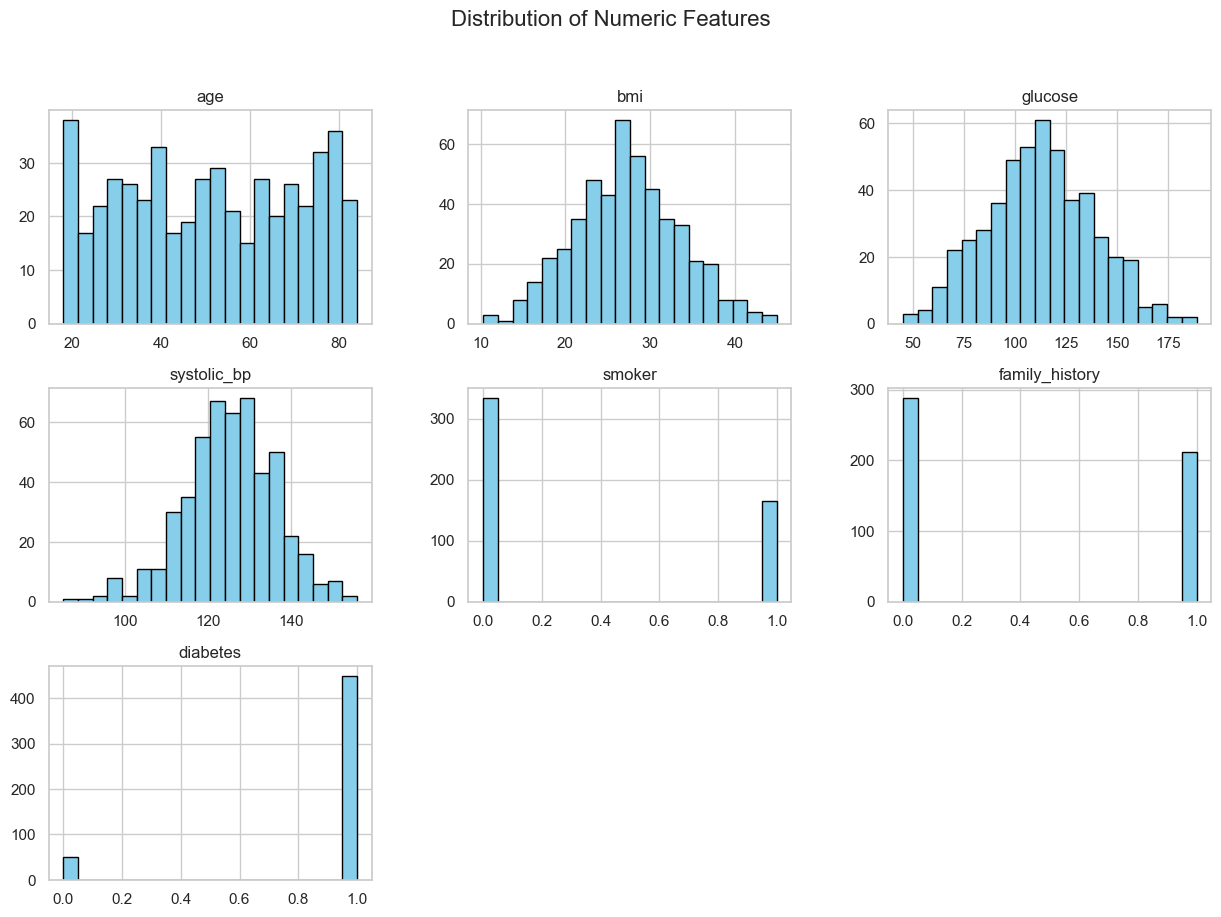

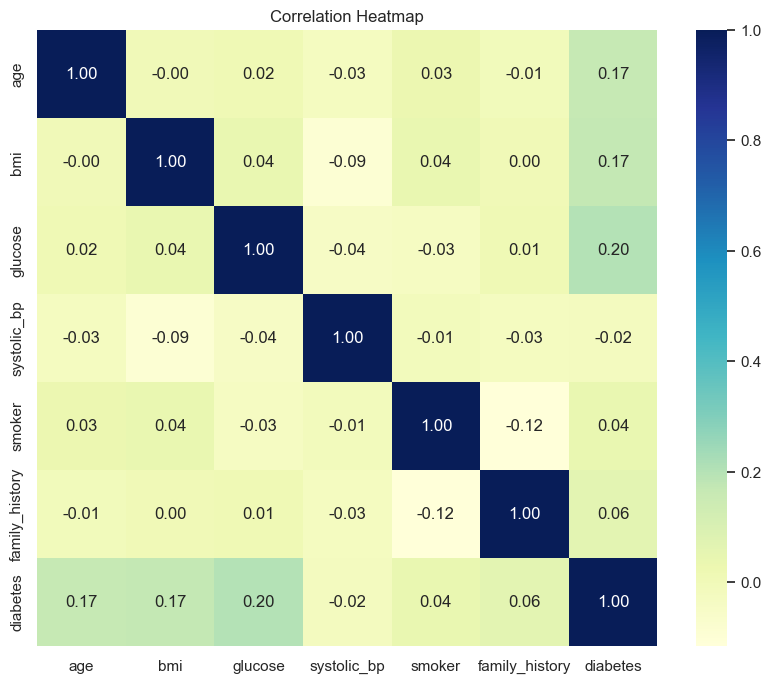

In [4]:
# --- Cell C: Exploratory Data Visualization ---

import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Distribution of numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
df[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

# 2️⃣ Check class balance for target variable (e.g., 'Diabetes')
if 'Diabetes' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Diabetes', data=df, palette='Set2')
    plt.title("Target Variable Distribution: Diabetes vs Non-Diabetes")
    plt.show()

# 3️⃣ Relationship between two key variables (example: BMI vs Glucose)
if 'BMI' in df.columns and 'Glucose' in df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x='BMI', y='Glucose', hue='Diabetes', data=df, palette='coolwarm', alpha=0.7)
    plt.title("Relationship: BMI vs Glucose")
    plt.show()

# 4️⃣ Correlation heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# --- Cell D: Feature Engineering ---

# 1️⃣ Create age categories (bins)
if 'Age' in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'],
                            bins=[0, 20, 35, 50, 65, 100],
                            labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])
    print("✅ Age groups created!")

# 2️⃣ Categorize BMI (Body Mass Index)
if 'BMI' in df.columns:
    df['BMI_Category'] = pd.cut(df['BMI'],
                                bins=[0, 18.5, 25, 30, 100],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    print("✅ BMI categories created!")

# 3️⃣ Create a binary risk flag based on multiple health indicators
if all(col in df.columns for col in ['Glucose', 'BMI', 'Age']):
    df['High_Risk'] = np.where(
        (df['Glucose'] > 130) | (df['BMI'] > 30) | (df['Age'] > 50),
        1, 0
    )
    print("✅ High_Risk flag created!")

# 4️⃣ Encode categorical features (convert to numeric for modeling)
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print(f"✅ Encoded {len(categorical_cols)} categorical columns")

# 5️⃣ Check the updated DataFrame
print("\nUpdated dataset:")
print(df.head())


✅ Encoded 1 categorical columns

Updated dataset:
   age   bmi  glucose  systolic_bp  smoker  phys_activity  family_history  \
0   69  25.4     64.0        130.0       0              2               0   
1   32  26.4    189.0        141.0       0              1               0   
2   78  32.1    166.0        113.0       1              2               0   
3   38  20.6     93.0        132.0       0              1               0   
4   41  22.8     54.0        107.0       1              1               0   

   diabetes  
0         0  
1         1  
2         1  
3         0  
4         1  


In [8]:
print(df.columns.tolist())


['age', 'bmi', 'glucose', 'systolic_bp', 'smoker', 'phys_activity', 'family_history', 'diabetes']


In [9]:
if 'Outcome' not in df.columns:
    df['High_Risk'] = ((df['bmi'] > 30) & (df['Age'] > 40)).astype(int)


KeyError: 'Age'

In [10]:
print(df.columns.tolist())



['age', 'bmi', 'glucose', 'systolic_bp', 'smoker', 'phys_activity', 'family_history', 'diabetes']


In [11]:
# --- Smart High_Risk column creation ---
cols = [c.lower() for c in df.columns]

# Use lower-case names for comparison
age_col = next((c for c in df.columns if 'age' in c.lower()), None)
bmi_col = next((c for c in df.columns if 'bmi' in c.lower()), None)
glucose_col = next((c for c in df.columns if 'glucose' in c.lower()), None)

if 'Outcome' not in df.columns and 'outcome' not in df.columns:
    if age_col and bmi_col:
        df['High_Risk'] = ((df[bmi_col] > 30) & (df[age_col] > 40)).astype(int)
        print("✅ Created High_Risk using Age + BMI")
    elif age_col and glucose_col:
        df['High_Risk'] = ((df[glucose_col] > 130) & (df[age_col] > 40)).astype(int)
        print("✅ Created High_Risk using Age + Glucose")
    else:
        print("⚠️ Could not create High_Risk — missing key columns")
else:
    print("ℹ️ Dataset already has Outcome column; using that for modeling.")


✅ Created High_Risk using Age + BMI


In [12]:
print(df.head())



   age   bmi  glucose  systolic_bp  smoker  phys_activity  family_history  \
0   69  25.4     64.0        130.0       0              2               0   
1   32  26.4    189.0        141.0       0              1               0   
2   78  32.1    166.0        113.0       1              2               0   
3   38  20.6     93.0        132.0       0              1               0   
4   41  22.8     54.0        107.0       1              1               0   

   diabetes  High_Risk  
0         0          0  
1         1          0  
2         1          1  
3         0          0  
4         1          0  


✅ Training samples: 400, Testing samples: 100
✅ Model training complete!

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        85
           1       0.93      0.93      0.93        15

    accuracy                           0.98       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.98      0.98      0.98       100

✅ Accuracy: 98.0 %


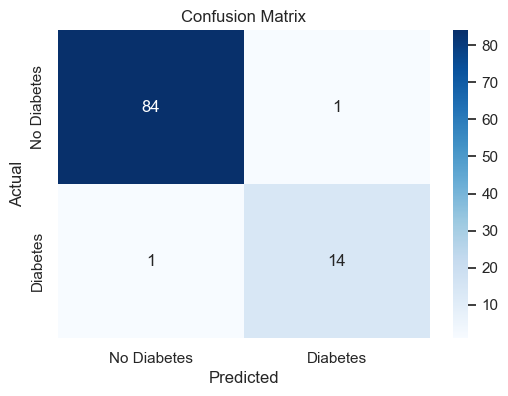

In [13]:
# --- Cell E: Modeling with Logistic Regression ---

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Define your target (what you want to predict) and features (what you’ll use to predict)
if 'Outcome' in df.columns:
    y = df['Outcome']  # usually 1 = diabetic, 0 = not diabetic
else:
    # If dataset doesn't have 'Outcome', use our engineered 'High_Risk' column instead
    y = df['High_Risk']

X = df.drop(columns=[y.name])  # all other columns are predictors

# 2️⃣ Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# 3️⃣ Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("✅ Model training complete!")

# 4️⃣ Make predictions
y_pred = model.predict(X_test)

# 5️⃣ Evaluate model performance
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# 6️⃣ Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
# --- Cell F: Model Evaluation and Insights ---

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 1) Generate predictions on the test data
y_pred = model.predict(X_test)

# ✅ 2) Evaluate model performance
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc:.2f}")

# Detailed metrics: precision


✅ Model Accuracy: 0.98


Top predictive features:
          Feature  Coefficient  Importance
7        diabetes     0.806236    0.806236
1             bmi     0.631408    0.631408
5   phys_activity    -0.392889    0.392889
6  family_history    -0.333038    0.333038
0             age     0.099712    0.099712
3     systolic_bp     0.016481    0.016481
2         glucose    -0.002962    0.002962
4          smoker    -0.001485    0.001485


C:\Users\USER\AppData\Local\Temp\ipykernel_5540\327902155.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


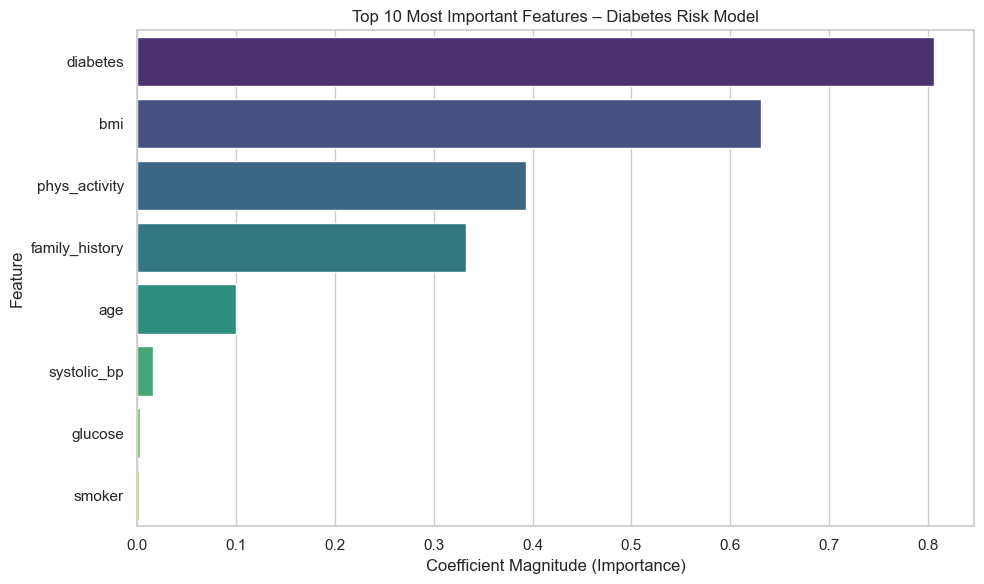

In [15]:
# --- Cell G: Feature Importance & Interpretation ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Extract feature importance (coefficients)
coefficients = model.coef_[0]
features = X.columns

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# 2️⃣ Display table of most important features
print("Top predictive features:")
print(importance_df.head(10))

# 3️⃣ Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Most Important Features – Diabetes Risk Model")
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


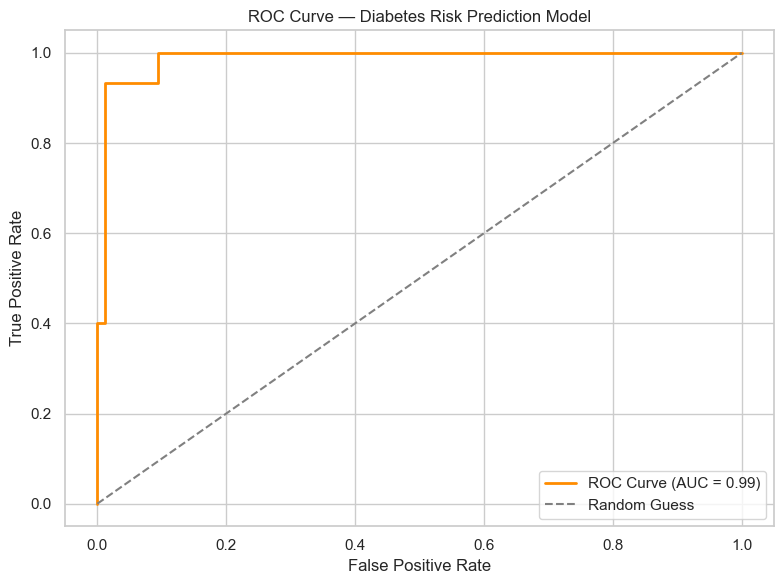

✅ AUC Score: 0.987
💾 Model saved as diabetes_risk_model.pkl


In [16]:
# --- Cell H: ROC Curve and Model Save ---

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import joblib

# 1️⃣ Get prediction probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # probability of being 'High Risk'

# 2️⃣ Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# 3️⃣ Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='darkorange', linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Diabetes Risk Prediction Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"✅ AUC Score: {auc_score:.3f}")

# 4️⃣ Save the trained model for reuse
joblib.dump(model, "diabetes_risk_model.pkl")
print("💾 Model saved as diabetes_risk_model.pkl")
